# 1. Importation des packages

In [7]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

# 2. Chargement de données

In [9]:
# Charger les données
data = pd.read_csv("Data/Phonebook_Data_3152025.csv")

## 2.1. Description de la Source de Données

In [ ]:
# Le dataset provient d'un système de gestion d'annuaire téléphonique d'une entreprise. 
# Il contient des informations sur les employés, telles que leur 
# ID, nom complet, email, département, numéro de travail, numéro de téléphone personnel, 
# ID du superviseur, ID du manager, et leur statut actuel (Actif/Inactif).

## 2.2. Description des Données

In [11]:
# Afficher les premières lignes du dataset
print(data.head())

# Informations générales sur le dataset
print(data.info())

# Statistiques descriptives
print(data.describe())

# Vérifier les valeurs manquantes
print(data.isnull().sum())

   EmployeeId                    Fullname                 Email  \
0       58645          Samalenge , Malesu                   NaN   
1       58646  Pungwe Kingombe, Dieudonné  kpungwe@tfm.cmoc.com   
2       58648        Nzita Ditati, Joseph                   NaN   
3       58649   Mbuku Kitukusu, Catherine                   NaN   
4       58652     Kahilu Kandala, Jacques  JKAHILU@TFM.CMOC.COM   

                        DepartmentName Work_Phone       PhoneNumber  \
0                    Mining Operations        NaN               NaN   
1  Cooperation & Compliance Management   558-2031  +243-82-000-1978   
2                          Exploration   558-1485  +243-82-000-1744   
3                     Catering & Camps        NaN               NaN   
4                            Quicklime        NaN               NaN   

   Supervisor ID  Manager ID EmployeeStatus  
0         113306    60089976         Active  
1          63320    80000337         Active  
2       60100187    60100187    

# 3. Analyse des Données

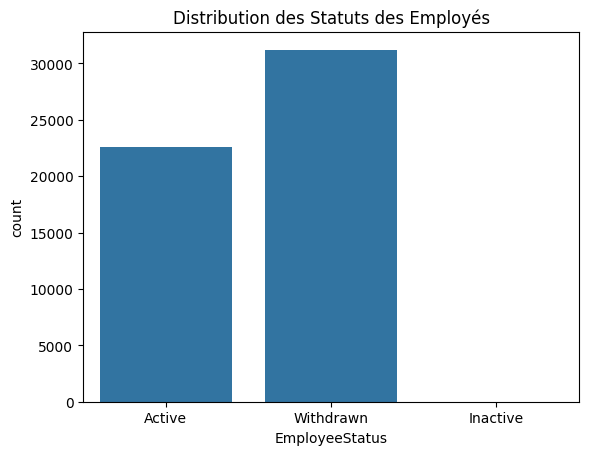

In [13]:
# Visualiser la distribution des statuts des employés
sns.countplot(x='EmployeeStatus', data=data)
plt.title("Distribution des Statuts des Employés")
plt.show()

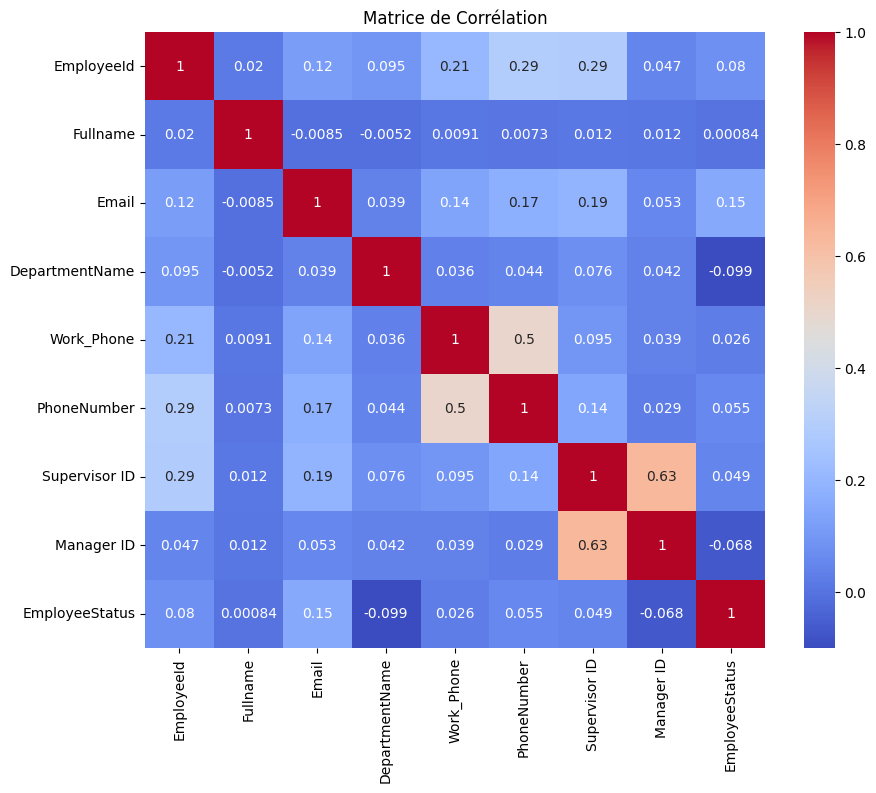

In [15]:
# Encoder les variables catégorielles pour l'analyse de corrélation
data_encoded = data.copy()
label_encoder = LabelEncoder()
for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

# 4. Prétraitement des Données

In [17]:
# Gestion les valeurs manquantes
data['Email'].fillna('inconnu', inplace=True)
data['Work_Phone'].fillna('000-000-0000', inplace=True)
data['PhoneNumber'].fillna('000-000-0000', inplace=True)

# Encoder les variables catégorielles
label_encoder = LabelEncoder()
data['DepartmentName'] = label_encoder.fit_transform(data['DepartmentName'])
data['EmployeeStatus'] = label_encoder.fit_transform(data['EmployeeStatus'])

# Sélectionner les features et la target
features = ['EmployeeId', 'DepartmentName', 'Supervisor ID', 'Manager ID']
X = data[features]
y = data['EmployeeStatus']

# Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. Division des Données (Train et Test)

In [19]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Construire le Modèle

## 6.1. Construire le Modèle Machine Learning (Random Forest)

In [46]:
# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)) * 100, '%')
print('R2 Score:', r2_score(y_test, y_pred_rf) * 100, '%')

Accuracy: 0.7812441968430827
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      4518
           1       0.00      0.00      0.00         0
           2       0.81      0.81      0.81      6252

    accuracy                           0.78     10770
   macro avg       0.52      0.52      0.52     10770
weighted avg       0.78      0.78      0.78     10770

Confusion Matrix:
 [[3360    0 1158]
 [   0    0    0]
 [1197    1 5054]]
RMSE: 93.52778523495763 %
R2 Score: 10.197687603180794 %


## 6.2. Construire le Modèle Deep Learning (Réseau de Neurones)

In [49]:
# Initialiser le modèle
dl_model = Sequential()

# Ajouter les couches
dl_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
dl_model.add(Dropout(0.2))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dropout(0.2))
dl_model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = dl_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred_dl = dl_model.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)) * 100, '%')
print('R2 Score:', r2_score(y_test, y_pred_rf) * 100, '%')

Epoch 1/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0142 - loss: -34.2651 - val_accuracy: 0.0162 - val_loss: -587.6564
Epoch 2/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0102 - loss: -1185.3920 - val_accuracy: 0.0164 - val_loss: -4191.9854
Epoch 3/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0149 - loss: -5592.4292 - val_accuracy: 0.0164 - val_loss: -12180.8066
Epoch 4/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0119 - loss: -14929.5518 - val_accuracy: 0.0137 - val_loss: -25535.2930
Epoch 5/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0105 - loss: -29446.2129 - val_accuracy: 0.0035 - val_loss: -44932.0625
Epoch 6/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0103 - loss: -48880.2812 - val_accuracy: 0.0056 - val_loss: -70935.1875
Epoch 7/50
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0090 - loss: -79845.9766 - val_accuracy: 0.0057 - val_loss: -104671.8125
Epoch 8/50
1077/1077 ━━━━━━

# 7. Visualiser l'Évolution de l'Entraînement du Réseau de Neurones

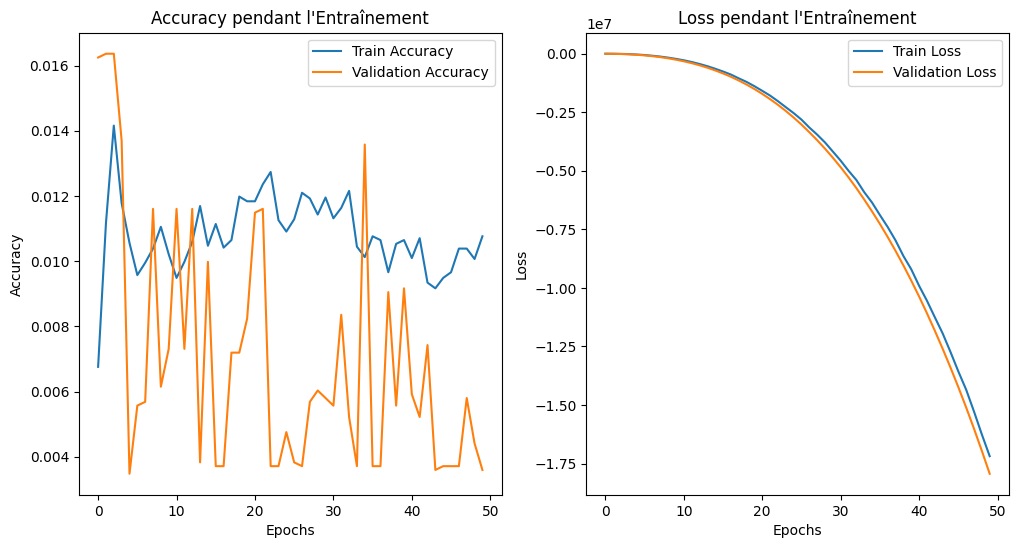

In [51]:
# Visualiser l'accuracy et la loss pendant l'entraînement
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy pendant l\'Entraînement')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss pendant l\'Entraînement')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 8. Évaluer le Modèle

In [53]:
# Prédire sur l'ensemble de test
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype(int)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred_dl))
print("Classification Report:\n", classification_report(y_test, y_pred_dl))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dl))

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.003714020427112349
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.01      0.02      4518
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00      6252

    accuracy                           0.00     10770
   macro avg       0.20      0.00      0.01     10770
weighted avg       0.25      0.00      0.01     10770

Confusion Matrix:
 [[  40 4478    0]
 [   0    0    0]
 [  26 6226    0]]


In [ ]:
# 9. Sauvegarder les Modèles Entraînés

In [35]:
import joblib

# Sauvegarder le modèle Random Forest
joblib.dump(rf_model, 'rf_model.pkl')

# Sauvegarder le modèle Deep Learning
dl_model.save('dl_model.keras')

In [41]:
import tensorflow as tf

# Charger le modèle Keras
model = tf.keras.models.load_model('dl_model.keras')

# Sauvegarder le modèle au format SavedModel
tf.saved_model.save(model, 'dl_model_savedmodel')

INFO:tensorflow:Assets written to: dl_model_savedmodel\assets


INFO:tensorflow:Assets written to: dl_model_savedmodel\assets
